'low'

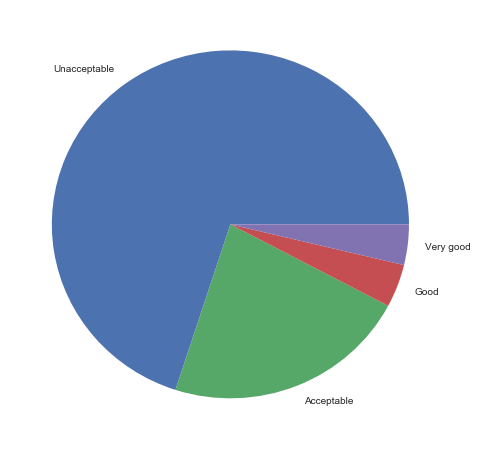

In [51]:
import pandas as pd

import sklearn
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', sep =',',
                  names = ["buying","maint","doors","persons","lug_boot","safety","eval"])
df["eval"].value_counts()
import pandas as pd
car_counts = pd.DataFrame(df["eval"].value_counts())
car_counts

car_counts["Percentage"] = car_counts["eval"]/car_counts.sum()[0]
car_counts

plt.figure(figsize=(8,8))
plt.pie(car_counts["Percentage"],
       labels = ["Unacceptable","Acceptable","Good","Very good"])

le = preprocessing.LabelEncoder()
encoded_buying = le.fit(df["buying"])
encoded_buying.classes_
encoded_buying.transform(["high"])
encoded_buying.transform(["low"])
encoded_buying.transform(["med"])
encoded_buying.transform(["vhigh"])
encoded_buying.inverse_transform(1)


In [2]:
for i in range(0,4):
    print(i, ":", encoded_buying.inverse_transform(i))

(0, ':', 'high')
(1, ':', 'low')
(2, ':', 'med')
(3, ':', 'vhigh')


In [3]:
df["e.buying"] = df["buying"].map(lambda x: encoded_buying.transform([x]))
df["e.buying"] = df["e.buying"].map(lambda x: x[0])
df[pd.isnull(df).any(axis=1)]

,buying,maint,doors,persons,lug_boot,safety,eval,e.buying


In [4]:
def encode_col (col_name):
    encodes = le.fit(df[col_name])
    new_col_name = "e."+col_name
    df[new_col_name] = df[col_name].map(lambda x:encodes.transform([x]))
    df[new_col_name] = df[new_col_name].map(lambda x:x[0])
    return


In [5]:
encode_col("maint")
encode_col("doors")
encode_col("persons")
encode_col("lug_boot")
encode_col("safety")
encode_col("eval")
df.head()

,buying,maint,doors,persons,lug_boot,safety,eval,e.buying,e.maint,e.doors,e.persons,e.lug_boot,e.safety,e.eval
0,vhigh,vhigh,2,2,small,low,unacc,3,3,0,0,2,1,2
1,vhigh,vhigh,2,2,small,med,unacc,3,3,0,0,2,2,2
2,vhigh,vhigh,2,2,small,high,unacc,3,3,0,0,2,0,2
3,vhigh,vhigh,2,2,med,low,unacc,3,3,0,0,1,1,2
4,vhigh,vhigh,2,2,med,med,unacc,3,3,0,0,1,2,2


In [6]:
X = df[['e.buying','e.maint','e.doors','e.persons','e.lug_boot','e.safety']]
type(X)

pandas.core.frame.DataFrame

In [7]:
y = df[["e.eval"]]
type(y)

pandas.core.frame.DataFrame

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 5)

TypeError: _init_params() got an unexpected keyword argument 'n_neigbors'

In [13]:
clf_knn = KNeighborsClassifier(n_neighbors = 5)

In [14]:
clf_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
clf_knn.fit(X_train, y_train)

C:\Users\Aparty\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
y_pred = clf_knn.predict(X_test)

In [17]:
print(metrics.accuracy_score(y_test, y_pred))

0.898148148148


In [19]:
correct_pred = []
wrong_pred = []

In [22]:
y_test2 = y_test.reset_index(drop = True)

In [21]:
y_test2 = y_test2.as_matrix()

AttributeError: 'numpy.ndarray' object has no attribute 'as_matrix'

In [24]:
for i in range(0, 432):
    if y_test2[i] != y_pred[i]:
        wrong_pred.append(i)
    else:
        correct_pred.append(i)

KeyError: 0

In [ ]:
print("Correctly identified: "+len(correct_pred))
print("Wrongly identified: "+len(wrong_pred))

In [25]:
X_test.head()

,e.buying,e.maint,e.doors,e.persons,e.lug_boot,e.safety
805,0,1,1,2,1,2
50,3,3,1,2,1,0
1171,2,2,3,1,2,2
1177,2,2,3,1,0,2
395,3,1,2,1,0,0


In [26]:
y_test[0:5]

,e.eval
805,0
50,2
1171,0
1177,0
395,0


In [27]:
y_pred[0:5]

array([2, 2, 0, 0, 0], dtype=int64)

In [28]:
y_test3 = y_test.to_frame()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [29]:
y_test3 = y_test3.reset_index()

NameError: name 'y_test3' is not defined

In [ ]:
y_test4 = y_test3.drop("e.eval",1)

In [30]:
wrong_list = []

In [31]:
for i in wrong_pred:
    wrong_index = y_test4.iloc[i]
    wrong_index1 = wrong_index[0]
    wrong_list.append(wrong_index1)

In [32]:
print(wrong_list)

[]


In [33]:
def knn_probs(index_num):
    X_param = x_test.ix[index_num]
    X_param = X_param.to_frame() 
    X_param = X_param.transpose() 
    
    temp_pred = clf_knn.predict_proba(X_param)
    temp_pred1 = temp_pred[0]
    
    y_actual = y_test[index_num]
    y_range = ["Unacceptable", "Acceptable","Good","Very Good"]
    print("For index num: ", index_num)
    print(" ")
    print("Features entered:")
    print(X_param)
    print(" Actual Score: ")
    print(y_actual, "(", y_range[y_actual],")")
    print(" ")
    print("Predicted probabilities:")
    
    for i in range(0,4):
        print(y_range[i], " : ", temp_pred_1[i])
    print(" ")
    
    if index_num in wrong_list:
        print("Label predicted -> Wrongly")
    else:
        print("Label predicted -> Correctly")
    return


        

In [34]:
y_test[0:3]

,e.eval
805,0
50,2
1171,0


In [35]:
knn_probs(805)

NameError: global name 'x_test' is not defined

In [ ]:
knn_probs(50)

In [ ]:
knn_probs(1171)

In [38]:
cm = confusion_matrix(y_test, y_pred)

In [39]:
cm

array([[ 76,   0,  22,   0],
       [  9,   3,   0,   0],
       [  7,   1, 303,   0],
       [  4,   0,   1,   6]], dtype=int64)

In [40]:
labels = ["Unacceptable", "Acceptable", "Good", "Very Good"]

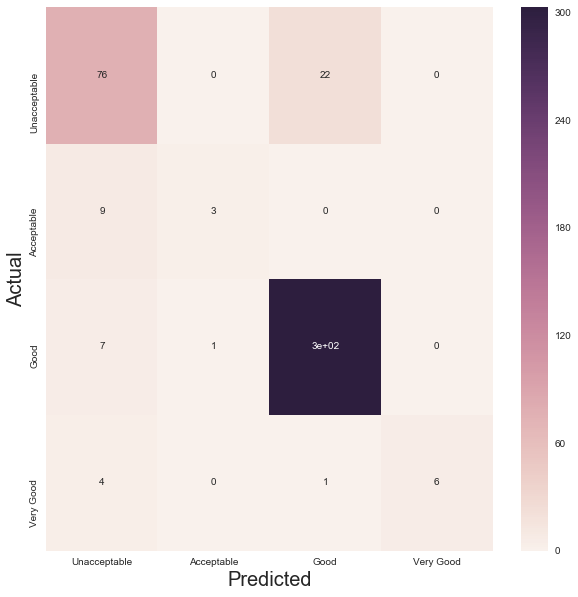

In [43]:
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                    columns = [i for i in labels])
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot = True)
plt.xlabel("Predicted", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)

In [44]:
scr_clf_knn = precision_recall_fscore_support(y_test, y_pred, average="weighted")

In [45]:
scr_clf_knn

(0.89500373968037561, 0.89814814814814814, 0.8910027851567095, None)

In [46]:
print("Classifier's precision: "+str(scr_clf_knn[0]))

Classifier's precision: 0.89500373968


In [47]:
print("Classifier's recall: "+str(scr_clf_knn[1]))

Classifier's recall: 0.898148148148


In [48]:
print("Classifier's fbeta_score: "+str(scr_clf_knn[2]))

Classifier's fbeta_score: 0.891002785157


In [52]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [53]:
scores = cross_val_score(knn, X, y, cv = 10, scoring = "accuracy")

IndexError: too many indices for array

In [ ]:
scores

In [ ]:
plt.figure(figsize = (9,9))
plt.plot(scores)
plt.ylabel("Accuracy")
plt.xlabel("Test Splits")
plt.grid(color = "r", linestyle = "--", linewidth = 0.5)

In [ ]:
scores.mean()

In [55]:
clf_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [57]:
clf_2 = KNeighborsClassifier(n_neighbors = 3)

In [58]:
clf_2.fit(X_train, y_train)

C:\Users\Aparty\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [59]:
y_pred_2 = clf_2.predict(X_test)

In [60]:
print(metrics.accuracy_score(y_test, y_pred_2))

0.844907407407


In [61]:
knn_new = KNeighborsClassifier()

In [62]:
k_range = range(1, 8)

In [63]:
weight_options = ['uniform', 'distance']

In [64]:
params = {"n_neighbors":k_range, "weights":weight_options}

In [65]:
grid = GridSearchCV(knn_new, params, cv = 10, scoring = "accuracy")

In [66]:
grid.fit(X, y)

IndexError: too many indices for array

In [67]:
grid.cv_results_

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [ ]:
grid.grid_scores_

In [ ]:
grid_scr = pd.DataFrame(grid.grid_scores_)

In [ ]:
grid_scr

In [ ]:
grid_scr.plot.bar(color = "grey", figsize=(10, 6))
plt.ylabel("Accuracy")
plt.xlabel("Params")
plt.grid(color = "blue", linestyle="--", linewidth=0.5)
plt.ylim((0.5, 0.78))

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
grid.best_estimator_